<a href="https://colab.research.google.com/github/Achapiyu/Sentiment-Analysis-NLP-with-Python/blob/main/Hands_on_of_AI_Master_Training_Advance_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advance Training AI Center for Learning and Optimization**

### **HANDS ON CODE**
<br/>

Dibuat dan dipaparkan oleh:

<img src="https://ailo.telkomuniversity.ac.id/wp-content/uploads/2023/07/cropped-logo-stempel-ai-center-1-219x60.png" width="200px"/>

© 2023 AI Center for Learning and Optimization

[Instagram](https://www.instagram.com/aicenter.telu/) | [Website](https://ailo.telkomuniversity.ac.id/)
<br/>
<br/>

### SETUP
Dataset yang digunakan ialah hasil crawling dari twitter dengan keyword "Ganjar" dan dilakukan pelabelan secara manual

In [ ]:
#Install transformers dan sastrawi
!pip install transformers
!pip install sastrawi
!pip install wordcloud

In [ ]:
#import library yang dibutuhkan
import re
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
#import data
df = pd.read_csv ('DataCapresGanjar.csv' , sep=';')

### EDA

In [ ]:
#Mendrop data kosong dan melihat dataframe
df = df.dropna()
df

,full_text,class
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",20
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",0
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,20
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",0
4,1 Muharam bersama GANJAR https,10
...,...,...
1019,@ganjarpranowo Dijateng banyak persoalan kok c...,2
1020,@tvOneNews Yg penting jangan dukung ganjar dah...,2
1021,@aan_muba @ganjarpranowo Kasihan murid yg dita...,0
1022,@ganjarpranowo @ESDMJateng Lalu setelah tau be...,2


In [ ]:
#Membenarkan penulisan label
df['class'] = df['class'].replace(10,1)
df['class'] = df['class'].replace(20,2)
#Merubah label dari float menjadi int
df['class'] = df['class'].astype(int)
df['class'].unique()

array([2, 0, 1])

<Axes: xlabel='class', ylabel='count'>

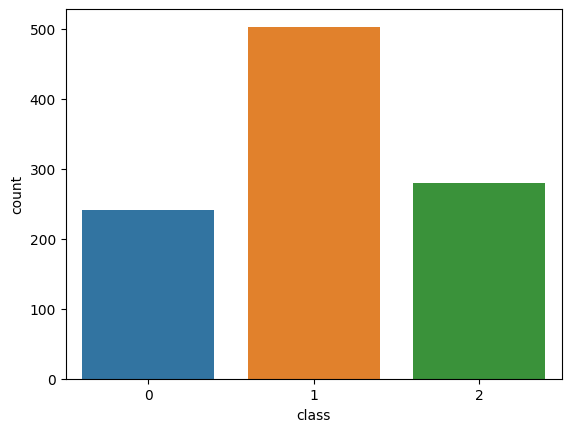

In [ ]:
import seaborn as sns
df["class"].isnull().sum()
sns.countplot(x= 'class', data=df)

In [ ]:
#Menyimpan label pada dataframe
df_class = df['class']
df_fulltext = df['full_text']
#Menghapus data yang tidak dibutuhkan
df = df.drop(['full_text'], axis=1) #--> isi ...
df

,class
0,2
1,0
2,2
3,0
4,1
...,...
1019,2
1020,2
1021,0
1022,2


In [ ]:
#Import library wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Mengambil data text yang akan dijadikan wordcloud
text = ' '.join(df['full_text'])

# Buat objek WordCloud
wordcloud = WordCloud(width=idth=800, height=800,background_color='white', min_font_size=10).generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Menampilkan wordcloud
plt.show()

SyntaxError: ignored

### PRE-PROCESSING
Akan dilakukan pemrosesan data supaya menjadi data yang siap pakai dibantu oleh library sastrawi sebagai stemmer dan stopword dan kamusAlay untuk kata baku

In [ ]:
#Import stopword dari sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Membuat stemmer sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# #Membuat stopword sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

#Menambah stopword
tambahanStopword = [...] #--> isi ...

# Mengambil Stopword bawaan
stop_factory = StopWordRemoverFactory().get_stop_words()

#Mengurangi stopword
stop_factory.remove("2") # isi --> ... (tambahkan remove stopword sesuai kebutuhan kalian)

# Merge stopword
data = ... #--> isi ...
dictionary = ArrayDictionary(data)
stopword = ... #--> isi ...

ValueError: ignored

In [ ]:
#Membuat kamus kata baku
kata_baku = pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/aic/kamus_kbbiv2.csv.txt')
kata_baku = kata_baku.set_index("kataAlay")["kataBaik"].to_dict()

In [ ]:
#Membuat fungsi untuk melakukan cleaning pada data
def cleaning(text):
    text = str(text)

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)

    # Menghapus hashtag dan username
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # Menghapus kata stopword dalam tweet dan merubahnya menjadi kata baku
    temp_text_split = []
    final_text = []
    text_split = text.split(' ')

    for i in range(len(text_split)):

        #Merubah kata menjadi kata baku
              if text_split[i] in kata_baku:
                  text_split[i] = ... #--> isi ...

              #Menghapus data yang kurang dari 3 karakter
              if len(list(str(text_split[i]))) > 3:
                 temp_text_split.append(str(text_split[i]))

    for i in range(len(temp_text_split)):
        if temp_text_split not in final_text:
            final_text.append(str(temp_text_split[i]))

    text = ' '.join(final_text)

    #Menghapus kata stopword dengan library sastrawi
    text = ... #--> isi ...

    #Melakukan stemming dengan library sastrawi
    text = ... #--> isi ...

    # Mengembalikan Hasil Preprocessing Text
    return text

In [ ]:
#Melakukan cleaning pada dataframe, dan membuat kolom baru bernama text_clean
df['text_clean'] = df['full_text'].apply(cleaning)
#Mengembalikan label pada dataframe
df['full_text'] = df_fulltext
df['class'] = df_class
#Menghapus NaN
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

In [ ]:
df

In [ ]:
#Import library wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Mengambil data text yang akan dijadikan wordcloud
text = ' '.join(df['full_text'])

# Buat objek WordCloud
wordcloud = WordCloud(...).generate(text) #isi --> ...

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Menampilkan wordcloud
plt.show()

In [ ]:
#Membagi data berdasarkan labelnya
data_negatif = df[df["class"]==2]
data_positif = df[df["class"]==1]
data_netral = df[df["class"]==0]

negatif_list = data_negatif["text_clean"].tolist()
positif_list = data_positif["text_clean"].tolist()
netral_list = data_netral["text_clean"].tolist()

In [ ]:
# Buat objek WordCloud untuk label positif

filtered_positif = ('').join(str(positif_list))

wordcloud = WordCloud(...).generate(...)  #isi --> ...

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Menampilkan wordcloud
plt.show()

In [ ]:
# Buat objek WordCloud untuk label positif

filtered_negatif = ('').join(str(positif_list))

wordcloud = WordCloud(...).generate(...)  #isi --> ...

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Menampilkan wordcloud
plt.show()

In [ ]:
# Buat objek WordCloud untuk label positif

filtered_netral = ('').join(str(positif_list))

wordcloud = WordCloud(...).generate(...)  #isi --> ...

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Menampilkan wordcloud
plt.show()

### Modeling SVM

In [ ]:
import seaborn as sns #library untuk memperindah visualisasi data
import matplotlib.pyplot as plt
import pandas as pd #library untuk mengolah data

#Setup Seaborn
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize':(16,9)})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataku = ... # isi --> ... (Lanjutkan dari data yang sudah dibuat diatas)
dataku.rename(columns={...}, inplace=True) # isi --> ...
dataku.label.value_counts() #MEnghitung Jumlah record berdasarkan label

In [ ]:
#proses training
import pickle #library menyimpan model
from sklearn.svm import SVC #library metode yang akan dipakai untuk membuat model
from sklearn.feature_extraction.text import TfidfVectorizer #library untuk merubah data text kedalam bentuk vektor
from sklearn.preprocessing import LabelEncoder #library untuk merubah data label string kedalam bentuk numerik

In [ ]:
#Merubah data label
dictio_label ={
    0:"Netral",
    1:"Positif",
    2:"Negatif"
}

dataku["label"]=dataku['label'].map(dictio_label)
dataku.label

In [ ]:
dataku = dataku.dropna() #mendrop record yang terdapat data kosong
dataku.isnull().sum() #menghitung data kosong per kolom

x = dataku.lemma #mengambil data pada kolom lemma
y = dataku.label #mengambil data pada kolom label

In [ ]:
encoder = LabelEncoder() #Memanggil class encoder
train_y = encoder.fit_transform(y) #encode data kolom label

#memanggil class untuk vektorizer
tfidf_vect = ... # isi --> ...

#Transform data pada kolom lemma kedalam bentuk vektor
tfidf_vect.fit(x)
train_x_tfidf = tfidf_vect.transform(x)

SVM = SVC(...) #memanggil metode training # isi --> ...
text_pickle =SVM.fit(train_x_tfidf, train_y) #membuat model

#save model
files = open('SVM_classifier_24.pickle','wb')
pickle.dump(text_pickle, files)
files.close()
print("selesai")

In [ ]:
#Loading model yang sudah disimpan
model = open('SVM_classifier_24.pickle', 'rb')
svm_classifier = pickle.load(model)
svm_classifier

In [ ]:
#Ekstrakasi fitur
from imblearn.over_sampling import SMOTE #Library untuk fitting data

vect = TfidfVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(dataku.lemma)

print(X)
#sm=SMOTE()

In [ ]:
from sklearn.model_selection import ShuffleSplit #library untuk split data
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix #library untuk evaluasi


X = dataku.lemma
Y = dataku.label

ss = ShuffleSplit(n_splits=10, test_size=0.2) # mensplit data
sm = SMOTE()

accs = []
fis = []
cms = []

for train_index, test_index in ss.split(X):
    X_train, X_test = X.iloc[...], X.iloc[...] #isi --> ...
    y_train, y_test = Y.iloc[...], Y.iloc[...]#isi --> ...

    X_train_vect = vect.fit_transform(...) #isi --> ...
    X_test_vect = vect.transform(...) #isi --> ...

    X_train_res, y_train_res = sm.fit_resample(...) #FITTING DATA #isi --> ...

    SVM.fit(...) #isi --> ...
    y_pred = SVM.predict(...)#memprediksi #isi --> ...

    accs.append(...) #menyimpan akurasi #isi --> ...
    fis.append(...) #menyimpan nilai f-1 #isi --> ...
    cms.append(...) #menyimpan confusion matrix #isi --> ...

print(classification_report(y_test,y_pred))
print("\naverage accuracy across fold : {:2f}%".format(sum(accs)/len(accs) *100))
print("\naverage F1-score across fold : {:2f}%".format(sum(fis)/len(fis) *100))
print("\naverage Confusion Matrix across fold : \n {}".format(sum(cms)/len(cms)))

In [ ]:
# Loading model yang sudah disimpan
model = open('...', 'rb') #isi --> ...
svm_classifier = pickle.load(model)
model.close()

In [ ]:
# Contoh penggunaan model untuk prediksi
input_text = ... #isi --> ...
text_vector = tfidf_vect.transform(...) #isi --> ...
predicted_label = encoder.inverse_transform(svm_classifier.predict(text_vector))
print(f"Prediksi sentimen teks: {predicted_label[0]}")